In [1]:
%pip install geopy
%pip install geocoder
%pip install scikit-image
%pip install scikit-learn
%pip install twilio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:


import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

In [3]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
path = "./traindata/"
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename =path+"%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


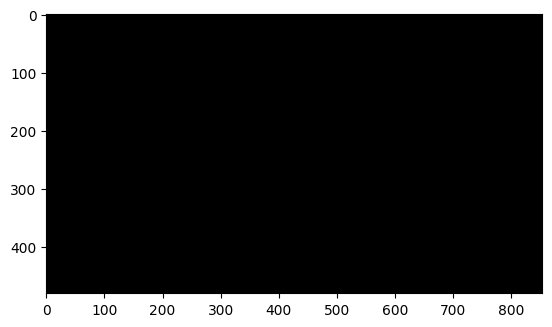

In [4]:
img = plt.imread('./traindata/0.jpg')   # reading image using its name
plt.imshow(img)

In [5]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [6]:
X = [ ]     # creating an empty array
tpath="traindata/"
for img_name in data.Image_ID:
    img = plt.imread(tpath + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [7]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [8]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [9]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [11]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [13]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 4s 1s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [14]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [15]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [16]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 2s 308ms/step - loss: 0.6663 - accuracy: 0.5935 - val_loss: 0.8542 - val_accuracy: 0.6716
Epoch 2/100
5/5 [==============================] - 1s 261ms/step - loss: 0.3789 - accuracy: 0.8581 - val_loss: 0.9756 - val_accuracy: 0.6716
Epoch 3/100
5/5 [==============================] - 1s 242ms/step - loss: 0.1893 - accuracy: 0.9290 - val_loss: 0.9153 - val_accuracy: 0.7015
Epoch 4/100
5/5 [==============================] - 1s 256ms/step - loss: 0.1258 - accuracy: 0.9677 - val_loss: 0.8221 - val_accuracy: 0.7612
Epoch 5/100
5/5 [==============================] - 1s 256ms/step - loss: 0.0970 - accuracy: 0.9871 - val_loss: 0.8201 - val_accuracy: 0.7910
Epoch 6/100
5/5 [==============================] - 1s 253ms/step - loss: 0.0514 - accuracy: 0.9935 - val_loss: 0.8594 - val_accuracy: 0.7612
Epoch 7/100
5/5 [==============================] - 1s 264ms/step - loss: 0.0444 - accuracy: 0.9935 - val_loss: 0.8373 - val_accuracy: 0.7761
Epoch 8/100
5

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    path="./test/"
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename =path+"test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [22]:
test = pd.read_csv('test.csv')

In [23]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread(path + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [24]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [25]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 0s 412ms/step


(6, 7, 7, 512)

In [26]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

ValueError: cannot reshape array of size 150528 into shape (9,25088)

In [ ]:
predictions = model.predict(test_image)

In [ ]:
print(predictions)

In [ ]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

In [ ]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = "ACc2a09b28a2a55c31129cb963048c4024"
auth_token = "72fa1731b0e3d58c8eab79830e178c49"
client = Client(account_sid, auth_token)

In [ ]:
import cv2
import datetime
import base64

cap = cv2.VideoCapture('Accident-1.mp4')
i=0
flag=0
snapshot_counter = 0
imgflag=0
while(True):
    ret,frame=cap.read()
    if ret==True:  
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            percent = predictions[int(i/15)%9][1]*100
            predict="No Accident" #+ str(percent)
        else:
            percent = predictions[int(i/15)%9][0]*100
            predict="Accident " + str(percent)
            flag=1

            if imgflag==0 and percent >80:
                AccSnapshotDir = 'AccSnaps/'      
                snapshot_filename = f'accident_snapshot_{snapshot_counter}.jpg'
                cv2.imwrite(AccSnapshotDir + snapshot_filename, frame)
                snapshot_counter += 1
                imgflag=1

        # Save a snapshot at the time of accident
            
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        # cv2.putText(frame,
        #         percent,
        #         (0, 255, 255),
        #         font, 1,
        #         (0, 255, 255),
        #         3,
        #         cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    
    with open(AccSnapshotDir + snapshot_filename, 'rb') as image_file:
        image_binary = image_file.read()
    base64_encoded = base64.b64encode(image_binary).decode('utf-8')
    # print(locname, datetime.datetime.now(), base64_encoded)
    client.messages.create(
                 body="Accident detected in "+"Kochi, Kerala",
                 from_= "+12568040182",
                 to= "+919074062399"
                 )
    # print(str(datetime.datetime.now().strftime("%X")))
    data = {
    "_loc": "Kochi, Kerala",
    "_time": str(datetime.datetime.now().strftime("%X")),
    "_date": str(datetime.datetime.now().strftime("%x")),
    "snapShot": base64_encoded,
    "_plate" : "MH 12 1234"
    } 
    response = requests.post('http://localhost:3000/addAccident', json=data)
    if response.status_code == 200:
        print("POST request successful")
    else:
        print("POST request failed with status code:", response.status_code)
        print("Response content:", response.text)

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()
